# 哈希表

In [2]:
# 哈希表的简单实现 
# 基于数组的实现方式

class Pair:
     def __init__(self,key:int,val:int) -> None:
         self.key=key
         self.val=val

class ArrayHashMap:
    """## 基于数组的哈希表
    """
    def __init__(self,size:int) -> None:
        self._size=size
        self.buckets: list[Pair|None]=[None]*self._size
    def hash_func(self,key:int):
        index = key%self._size
        return index
    
    def get(self,key:int)->int:
        """## 

        ### Args:
            - `key (int)`: _description_

        ### Returns:
            - `int`: _description_
        """
        index = self.hash_func(key)
        pair= self.buckets[index]
        if pair is None:
            return None
        return pair.val
    
    def put(self,key:int,val:int):
        
        pair=Pair(key,val)
        index=self.hash_func(key)
        self.buckets[index]=pair
    
    def remove(self,key:int):
        index=self.hash_func(key)
        self.buckets[index]=None
    def entry_set(self)->list[Pair]:
        """## 获取键值对

        ### Returns:
            - `list[Pair]`: _description_
        """
        result: list[Pair]=[]
        for pair in self.buckets:
            if pair is not None:
                result.append(pair)
        return result
    def key_set(self) -> list[int]:
        """获取所有键"""
        result = []
        for pair in self.buckets:
            if pair is not None:
                result.append(pair.key)
        return result

    def value_set(self) -> list[str]:
        """获取所有值"""
        result = []
        for pair in self.buckets:
            if pair is not None:
                result.append(pair.val)
        return result

    def print(self):
        """打印哈希表"""
        for pair in self.buckets:
            if pair is not None:
                print(pair.key, "->", pair.val)
if __name__ == "__main__":
    # 初始化哈希表
    hmap = ArrayHashMap(100)

    # 添加操作
    hmap.put(12836, "小哈")
    hmap.put(15937, "小啰")
    hmap.put(16750, "小算")
    hmap.put(13276, "小法")
    hmap.put(10583, "小鸭")

    # 查询操作
    name = hmap.get(15937)

    # 删除操作
    hmap.remove(10583)

    # 遍历哈希表
    print("\n遍历键值对 Key->Value")
    for pair in hmap.entry_set():
        print(pair.key, "->", pair.val)


遍历键值对 Key->Value
12836 -> 小哈
15937 -> 小啰
16750 -> 小算
13276 -> 小法


## 哈希冲突与扩容
从本质上看，哈希函数的作用是将所有 key 构成的输入空间映射到数组所有索引构成的输出空间，而输入空间往往远大于输出空间。因此，理论上一定存在“多个输入对应相同输出”的情况
对于上述示例中的哈希函数，当输入的 key 后两位相同时，哈希函数的输出结果也相同。例如，查询学号为 12836 和 20336 的两个学生时，我们得到：

12836 % 100 = 36
20336 % 100 = 36
两个学号指向了同一个姓名，这显然是不对的。我们将这种多个输入对应同一输出的情况称为哈希冲突（hash collision）。
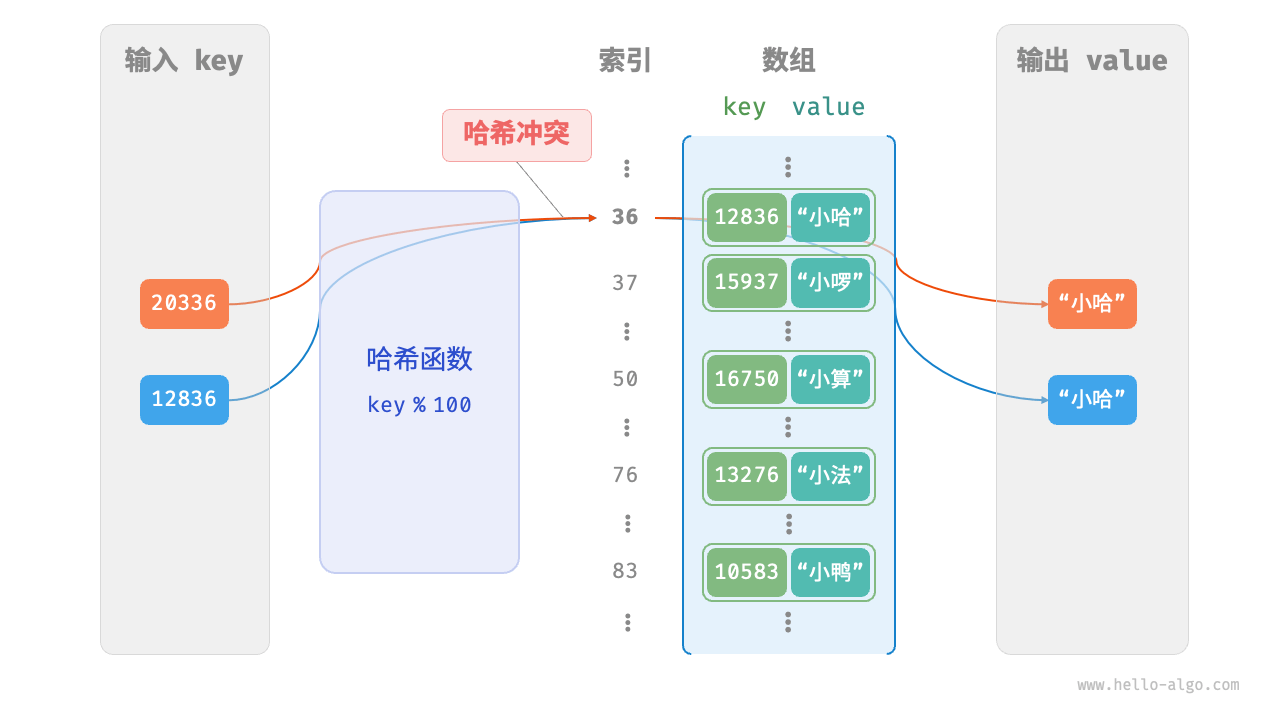
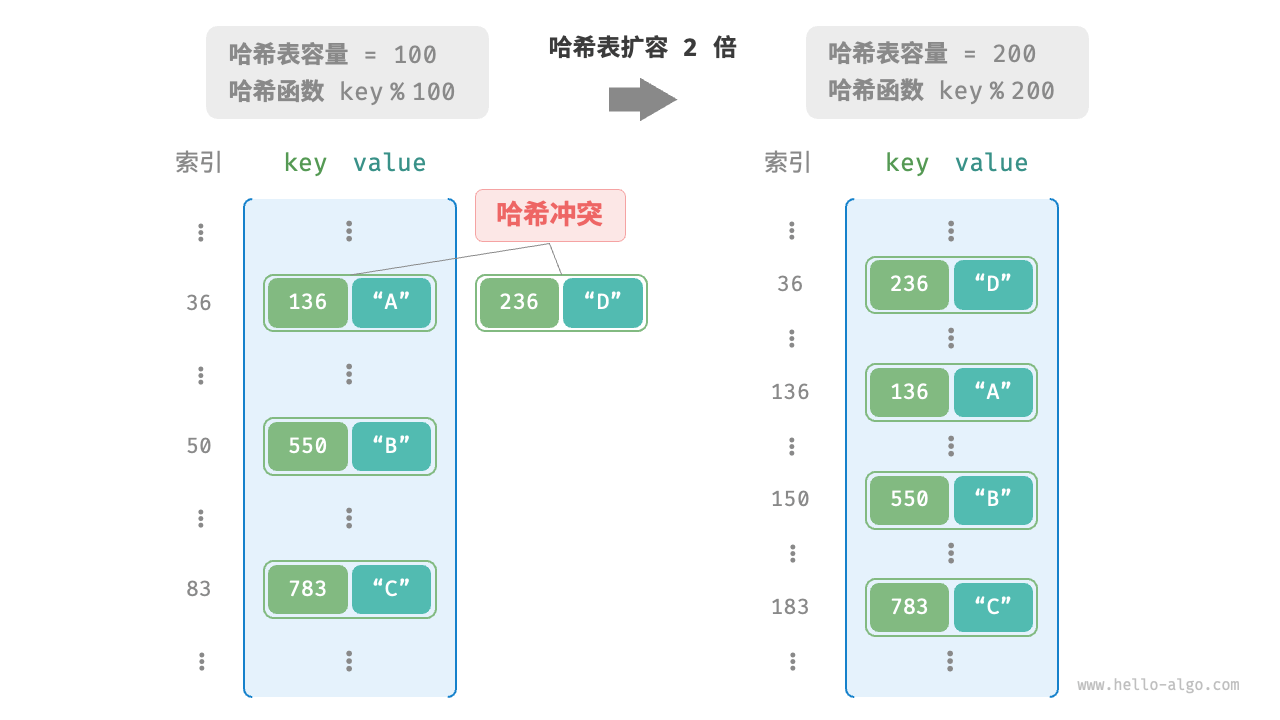

哈希冲突 
上一节提到，通常情况下哈希函数的输入空间远大于输出空间，因此理论上哈希冲突是不可避免的。比如，输入空间为全体整数，输出空间为数组容量大小，则必然有多个整数映射至同一桶索引。

哈希冲突会导致查询结果错误，严重影响哈希表的可用性。为了解决该问题，每当遇到哈希冲突时，我们就进行哈希表扩容，直至冲突消失为止。此方法简单粗暴且有效，但效率太低，因为哈希表扩容需要进行大量的数据搬运与哈希值计算。为了提升效率，我们可以采用以下策略。

改良哈希表数据结构，使得哈希表可以在出现哈希冲突时正常工作。
仅在必要时，即当哈希冲突比较严重时，才执行扩容操作。
哈希表的结构改良方法主要包括“链式地址”和“开放寻址”。

以下代码给出了链式地址哈希表的简单实现，需要注意两点。
·使用列表（动态数组）代替链表，从而简化代码。在这种设定下，哈希表（数组）包含多个桶，每个桶都是一个列表。
·以下实现包含哈希表扩容方法。当负载因子超过号时，我们将哈希表扩容至原先的2倍。

In [7]:
# 链式地址
class Pair:
     def __init__(self,key:int,val:int) -> None:
         self.key=key
         self.val=val


class HashMapChaining:
    
    def __init__(self) -> None:
        self.size=0
        self.capacity = 4 # 哈希表容量
        self.load_thres = 2.0/3.0 #触发扩容的负载因子阈值
        self.extend_ratio = 2 #扩容倍数
        self.buckets = [[] for _ in range(self.capacity)] #桶数组 
    def hash_func(self,key:int)->int:
        """## 返回哈希索引

        ### Args:
            - `key (int)`: _description_

        ### Returns:
            - `int`: _description_
        """
        return (key%self.capacity)
    
    def load_factor(self)->int:
        """## 负载因子

        ### Returns:
            - `int`: _description_
        """
        return self.size/self.capacity
    
    def get(self,key:int):
        """## 查询键值

        ### Args:
            - `key (int)`: _description_
        """
        index = self.hash_func(key)
        bucket = self.buckets[index]
        for pair in bucket:
            if pair.key == key:
                return pair.val
        return None

    def extend(self):
        """## 扩容哈希表
        """
        buckets =self.buckets
        self.capacity *= self.extend_ratio
        self.size = 0 
        self.buckets = [[] for _ in range(self.capacity)]
        for bucket in buckets:
            for pair in bucket:
                self.put(pair.key,pair.val)
    
    def put(self,key:int,val:str):
        """## 添加操作

        ### Args:
            - `key (int)`: _description_
            - `val (str)`: _description_
        """
        if self.load_factor()>self.load_thres:
            self.extend()
        index = self.hash_func(key)
        bucket = self.buckets[index]
        for pair in bucket:
            if pair.key == key:
                pair.val = val
                return
        pair = Pair(key,val)
        bucket.append(pair)
        self.size+=1
        
    def remove(self, key: int):
        """删除操作"""
        index = self.hash_func(key)
        bucket = self.buckets[index]
        # 遍历桶，从中删除键值对
        for pair in bucket:
            if pair.key == key:
                bucket.remove(pair)
                self.size -= 1
                break

    def print(self):
        """打印哈希表"""
        for bucket in self.buckets:
            res = []
            for pair in bucket:
                res.append(str(pair.key) + " -> " + pair.val)
            print(res)

"""Driver Code"""
if __name__ == "__main__":
    # 初始化哈希表
    hashmap = HashMapChaining()

    # 添加操作
    hashmap.put(12836, "小哈")
    hashmap.put(15937, "小啰")
    hashmap.put(16750, "小算")
    hashmap.put(13276, "小法")
    hashmap.put(10583, "小鸭")

    # 查询操作
    name = hashmap.get(13276)
    print(name)
    # 删除操作

小法


## 开放寻址
开放寻址（open addressing）不引入额外的数据结构，而是通过“多次探测”来处理哈希冲突，探测方式主要包括线性探测、平方探测和多次哈希等。

下面以线性探测为例，介绍开放寻址哈希表的工作机制
线性探测采用固定步长的线性搜索来进行探测，其操作方法与普通哈希表有所不同。

* 插入元素：通过哈希函数计算桶索引，若发现桶内已有元素，则从冲突位置向后线性遍历（步长通常为 
 ），直至找到空桶，将元素插入其中。
* 查找元素：若发现哈希冲突，则使用相同步长向后进行线性遍历，直到找到对应元素，返回 value 即可；如果遇到空桶，说明目标元素不在哈希表中，返回 None 。
图 6-6 展示了开放寻址（线性探测）哈希表的键值对分布。根据此哈希函数，最后两位相同的 key 都会被映射到相同的桶。而通过线性探测，它们被依次存储在该桶以及之下的桶中。
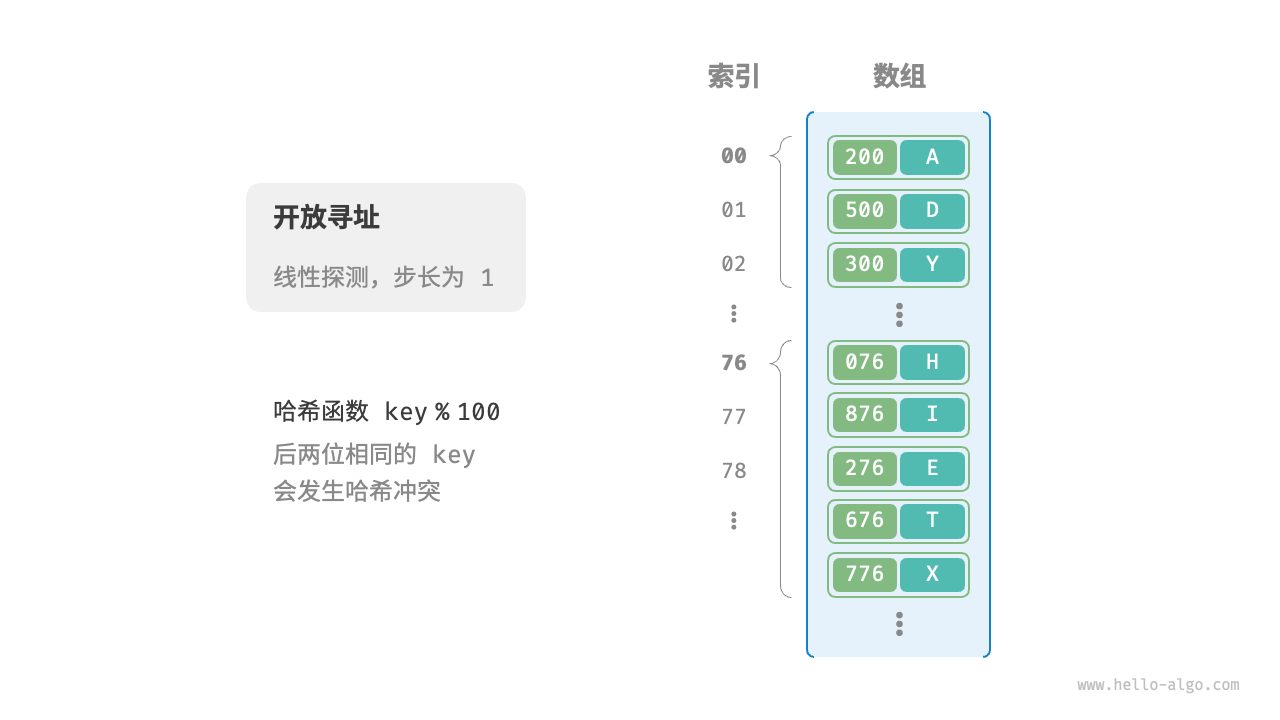

然而，线性探测容易产生“聚集现象”。具体来说，数组中连续被占用的位置越长，这些连续位置发生哈希冲突的可能性越大，从而进一步促使该位置的聚堆生长，形成恶性循环，最终导致增删查改操作效率劣化。

值得注意的是，我们不能在开放寻址哈希表中直接删除元素。这是因为删除元素会在数组内产生一个空桶 None ，而当查询元素时，线性探测到该空桶就会返回，因此在该空桶之下的元素都无法再被访问到，程序可能误判这些元素不存在，如图 6-7 所示。
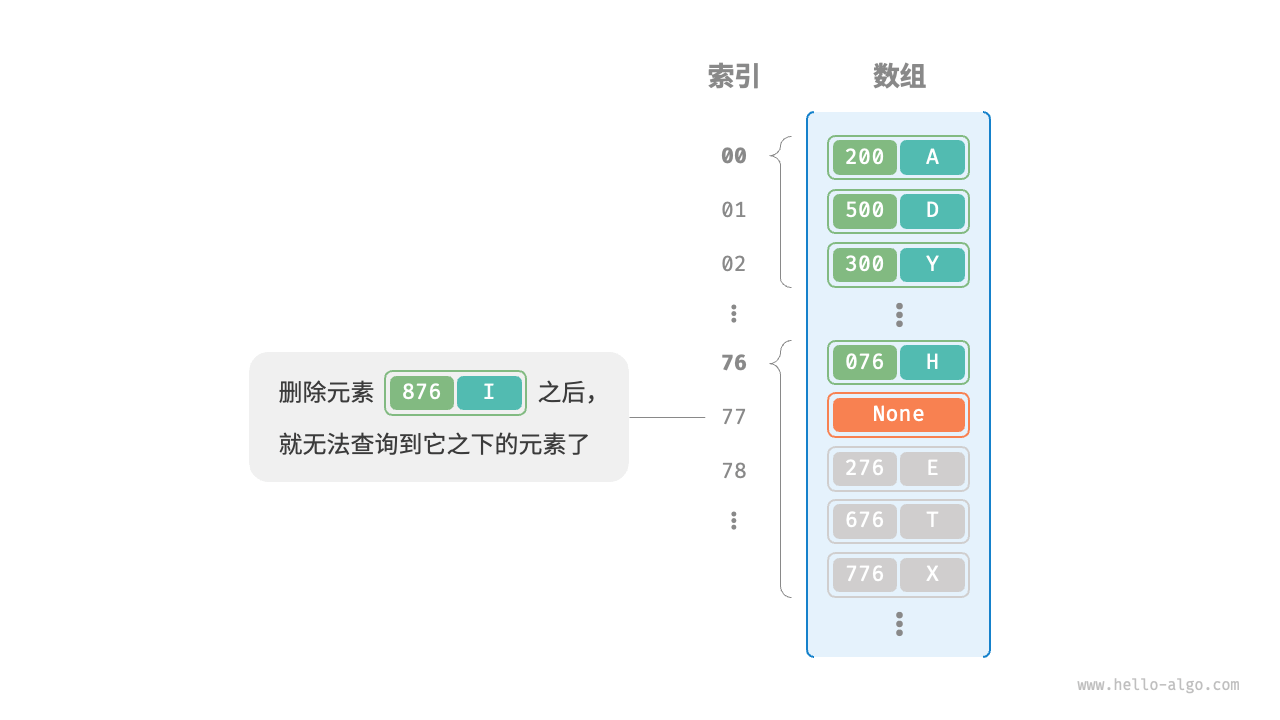
为了解决该问题，我们可以采用懒删除（lazy deletion）机制：它不直接从哈希表中移除元素，而是利用一个常量 TOMBSTONE 来标记这个桶。在该机制下，None 和 TOMBSTONE 都代表空桶，都可以放置键值对。但不同的是，线性探测到 TOMBSTONE 时应该继续遍历，因为其之下可能还存在键值对。

然而，懒删除可能会加速哈希表的性能退化。这是因为每次删除操作都会产生一个删除标记，随着 TOMBSTONE 的增加，搜索时间也会增加，因为线性探测可能需要跳过多个 TOMBSTONE 才能找到目标元素。

为此，考虑在线性探测中记录遇到的首个 TOMBSTONE 的索引，并将搜索到的目标元素与该 TOMBSTONE 交换位置。这样做的好处是当每次查询或添加元素时，元素会被移动至距离理想位置（探测起始点）更近的桶，从而优化查询效率。

以下代码实现了一个包含懒删除的开放寻址（线性探测）哈希表。为了更加充分地使用哈希表的空间，我们将哈希表看作一个“环形数组”，当越过数组尾部时，回到头部继续遍历。

In [ ]:
# 链式地址 线性探测
class Pair:
     def __init__(self,key:int,val:int) -> None:
         self.key=key
         self.val=val


class HashMapChaining:
    
    def __init__(self) -> None:
        self.size=0
        self.capacity = 4 # 哈希表容量
        self.load_thres = 2.0/3.0 #触发扩容的负载因子阈值
        self.extend_ratio = 2 #扩容倍数
        self.buckets: list[Pair | None] = [None] * self.capacity  # 桶数组
        self.TOMBSTONE = Pair(-1,'-1')
    def hash_func(self, key: int) -> int:
        """哈希函数"""
        return key % self.capacity

    def load_factor(self) -> float:
        """负载因子"""
        return self.size / self.capacity
    def find_bucket(self,key:int)->int:
        """## 差找桶值

        ### Args:
            - `key (int)`: _description_

        ### Returns:
            - `int`: _description_
        """
        index = self.hash_func(key)
        first_tombstone=-1
        #线性探测 当遇到空桶时跳出
        while self.buckets[index] is not None:
            if self.buckets[index].key == key: #已经遇到了冲突
                # 若之前遇到了删除标记，则将键值对移动至该索引处
                if first_tombstone !=-1:
                    self.buckets[first_tombstone] = self.buckets[index]
                    self.buckets[index]= self.TOMBSTONE
                    return first_tombstone
                return index 
            
            # 没有遇到冲突
            # 记录遇到的首个删除标记
            if first_tombstone == -1 and self.buckets[index] is self.TOMBSTONE:
                first_tombstone = index
            # 计算桶索引，越过尾部则返回头部
            index = (index + 1) % self.capacity
        # 若 key 不存在，则返回添加点的索引
        return index if first_tombstone == -1 else first_tombstone
                
    def get(self,key:int)->str:
        """## 查询操作

        ### Args:
            - `key (int)`: _description_

        ### Returns:
            - `str`: _description_
        """
        
        index = self.find_bucket(key)        
        
        # 若找到键值对，则返回对应 val
        if self.buckets[index] not in [None, self.TOMBSTONE]:
            return self.buckets[index].val
        # 若键值对不存在，则返回 None
        return None

    def put(self, key: int, val: str):
        """添加操作"""
        # 当负载因子超过阈值时，执行扩容
        if self.load_factor() > self.load_thres:
            self.extend()
        # 搜索 key 对应的桶索引
        index = self.find_bucket(key)
        # 若找到键值对，则覆盖 val 并返回
        if self.buckets[index] not in [None, self.TOMBSTONE]:
            self.buckets[index].val = val
            return
        # 若键值对不存在，则添加该键值对
        self.buckets[index] = Pair(key, val)
        self.size += 1

    def remove(self, key: int):
        """删除操作"""
        # 搜索 key 对应的桶索引
        index = self.find_bucket(key)
        # 若找到键值对，则用删除标记覆盖它
        if self.buckets[index] not in [None, self.TOMBSTONE]:
            self.buckets[index] = self.TOMBSTONE
            self.size -= 1

    def extend(self):
        """扩容哈希表"""
        # 暂存原哈希表
        buckets_tmp = self.buckets
        # 初始化扩容后的新哈希表
        self.capacity *= self.extend_ratio
        self.buckets = [None] * self.capacity
        self.size = 0
        # 将键值对从原哈希表搬运至新哈希表
        for pair in buckets_tmp:
            if pair not in [None, self.TOMBSTONE]:
                self.put(pair.key, pair.val)

    def print(self):
        """打印哈希表"""
        for pair in self.buckets:
            if pair is None:
                print("None")
            elif pair is self.TOMBSTONE:
                print("TOMBSTONE")
            else:
                print(pair.key, "->", pair.val)

## 平方探测
平方探测与线性探测类似，都是开放寻址的常见策略之一。当发生冲突时，平方探测不是简单地跳过一个固定的步数，而是跳过“探测次数的平方”的步数，即1，4，9步
平方探测主要具有以下优势。

* 平方探测通过跳过探测次数平方的距离，试图缓解线性探测的聚集效应。
* 平方探测会跳过更大的距离来寻找空位置，有助于数据分布得更加均匀。
然而，平方探测并不是完美的。

* 仍然存在聚集现象，即某些位置比其他位置更容易被占用。
* 由于平方的增长，平方探测可能不会探测整个哈希表，这意味着即使哈希表中有空桶，平方探测也可能无法访问到它。

## 多次哈希
顾名思义，多次哈希方法使用多个哈希函数进行探测

# 哈希算法

键值对的分布情况由哈希函数决定。回忆哈希函数的计算步骤，先计算哈希值，再对数组长度取模：
index = hash(key) % capacity
观察以上公式，当哈希表容量capacity固定时，哈希算法hash()决定了输出值，进而决定了键值对在哈希表中的分布情况。
## 哈希算法的目标
为了实现“既快又稳”的哈希表数据结构，哈希算法应具备以下特点。

* 确定性：对于相同的输入，哈希算法应始终产生相同的输出。这样才能确保哈希表是可靠的。
* 效率高：计算哈希值的过程应该足够快。计算开销越小，哈希表的实用性越高。
* 均匀分布：哈希算法应使得键值对均匀分布在哈希表中。分布越均匀，哈希冲突的概率就越低。
* 
实际上，哈希算法除了可以用于实现哈希表，还广泛应用于其他领域中
* 加法哈希：对输入的每个字符的 ASCII 码进行相加，将得到的总和作为哈希值。
* 乘法哈希：利用乘法的不相关性，每轮乘以一个常数，将各个字符的 ASCII 码累积到哈希值中。
* 异或哈希：将输入数据的每个元素通过异或操作累积到一个哈希值中。
* 旋转哈希：将每个字符的 ASCII 码累积到一个哈希值中，每次累积之前都会对哈希值进行旋转操作。

In [ ]:
def add_hash(key: str) -> int:
    """加法哈希"""
    hash = 0
    modulus = 1000000007
    for c in key:
        hash += ord(c)
    return hash % modulus

def mul_hash(key: str) -> int:
    """乘法哈希"""
    hash = 0
    modulus = 1000000007
    for c in key:
        hash = 31 * hash + ord(c)
    return hash % modulus

def xor_hash(key: str) -> int:
    """异或哈希"""
    hash = 0
    modulus = 1000000007
    for c in key:
        hash ^= ord(c)
    return hash % modulus

def rot_hash(key: str) -> int:
    """旋转哈希"""
    hash = 0
    modulus = 1000000007
    for c in key:
        hash = (hash << 4) ^ (hash >> 28) ^ ord(c)
    return hash % modulus

In [10]:
class ListNode:
    def __init__(self,val):
        self.next: ListNode =None
        self.val:int = val
num = 3
hash_num = hash(num)
# 整数 3 的哈希值为 3

bol = True
hash_bol = hash(bol)
# 布尔量 True 的哈希值为 1

dec = 3.14159
hash_dec = hash(dec)
# 小数 3.14159 的哈希值为 326484311674566659

str = "Hello 算法"
hash_str = hash(str)
# 字符串“Hello 算法”的哈希值为 4617003410720528961

tup = (12836, "小哈")
hash_tup = hash(tup)
# 元组 (12836, '小哈') 的哈希值为 1029005403108185979

obj = ListNode(0)
hash_obj = hash(obj)
# 节点对象 <ListNode object at 0x1058fd810> 的哈希值为 274267521